# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


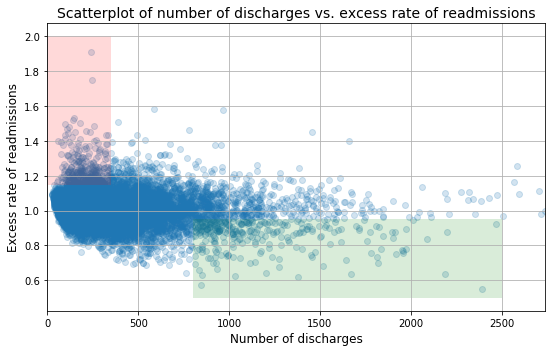

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

### Question A

In [6]:
hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


The current analysis use linear regression method to assess the relationship between "Excess Readmission Rate" and "number of Discharges". However there is little evidence that the linear regression relationship between these two variables are valid. More Inferential statistics on the linear regression relationship between these two varibles need to be conducted. There are many cases that the hospitcal discharge patient quickly and have low readmission rate, but there are also many cases that the hospital performed badly, and cause high readmission rate with high discharge rate. 

Hacker statistics can be utilized to resample the data, to provide a specific confidence interval on the statistics. 

### Question B

1. Setup an appropriate hypothesis test.

A new feature is created to predict 'Excess Readmission Ratio', it is the ratio between 'Number of Discharges' and 'Number of Readmissions'. The hypothesis is that there should be a linear relationship between readmission/discharge ratio with excess readmission ratio. The slope between these two variables should be positive bigger than zero.

2. Compute and report the observed significance value (or p-value).

In [8]:
hospital_read_df['Number of Discharges'] = pd.to_numeric(hospital_read_df['Number of Discharges'], errors='coerce')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          11578 non-null float64
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
#Drop rows with empty Number of Readmissions and Number of Discharges
hospital_read_df.dropna(subset=['Number of Readmissions', 'Number of Discharges'],inplace=True)
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
hospital_read_df['adm dis ratio'] = hospital_read_df['Number of Readmissions'] / hospital_read_df['Number of Discharges']
hospital_read_df['adm dis ratio'].head()

0    0.157025
1    0.133603
2    0.090444
3    0.098446
4    0.134228
Name: adm dis ratio, dtype: float64

In [11]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 13 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
adm dis ratio                 11497 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.2+ MB


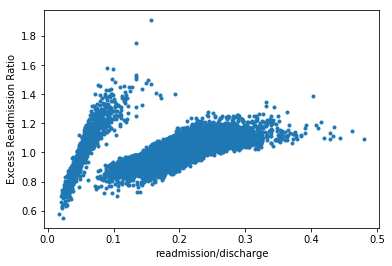

0.41398570149703057


In [12]:
# Plot 'the adm dis ratio' and 'excess readmission rate'
_ = plt.plot(hospital_read_df['adm dis ratio'], hospital_read_df['Excess Readmission Ratio'], marker='.', linestyle='none')

# Set the margins and label axes
_ = plt.xlabel('readmission/discharge')
_ = plt.ylabel('Excess Readmission Ratio')

# Show the plot
plt.show()

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Show the Pearson correlation coefficient
print(pearson_r(hospital_read_df['adm dis ratio'], hospital_read_df['Excess Readmission Ratio']))

In [13]:
#Use spectral clustering method to label the trend that follows regression behavior
from sklearn.cluster import SpectralClustering
short_df = hospital_read_df[['adm dis ratio','Excess Readmission Ratio']]

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


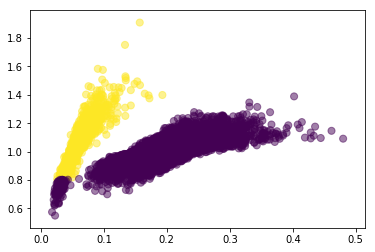

In [16]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize')
labelsS = model.fit_predict(short_df)
plt.scatter(short_df['adm dis ratio'], short_df['Excess Readmission Ratio'], c=labelsS, s=50, alpha=0.5)

In [18]:
short_df['label'] = labelsS
short_df_1 = short_df[short_df['label']==0]
short_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10250 entries, 35 to 13730
Data columns (total 3 columns):
adm dis ratio               10250 non-null float64
Excess Readmission Ratio    10250 non-null float64
label                       10250 non-null int64
dtypes: float64(2), int64(1)
memory usage: 320.3 KB


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


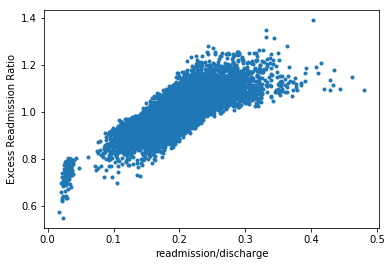

0.7948282226320171


In [19]:
# Plot 'the adm dis ratio' and 'excess readmission rate'
_ = plt.plot(short_df_1['adm dis ratio'], short_df_1['Excess Readmission Ratio'], marker='.', linestyle='none')

# Set the margins and label axes
_ = plt.xlabel('readmission/discharge')
_ = plt.ylabel('Excess Readmission Ratio')

# Show the plot
plt.show()

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Show the Pearson correlation coefficient
print(pearson_r(short_df_1['adm dis ratio'], short_df_1['Excess Readmission Ratio']))

In [20]:
#linear regression of these two parameters
a, b = np.polyfit(short_df_1['adm dis ratio'],short_df_1['Excess Readmission Ratio'],1)

# Print the result
print('slope:', a, 'intercept:', b)

slope: 1.2635348867498504 intercept: 0.7524843109179279


In [21]:

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[1.23942309 1.28627439]
[0.74790693 0.75743696]


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


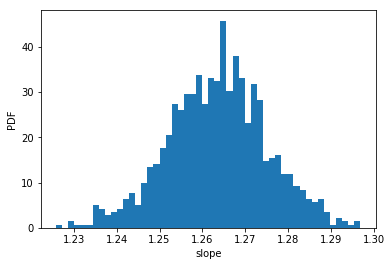

In [32]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(short_df_1['adm dis ratio'].values,short_df_1['Excess Readmission Ratio'].values,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))
print(np.percentile(bs_intercept_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

From the bootstrap pair simulated slope and intercept, the observed linear regression is real, and the relationship between  'adm dis ratio' and 'Excess Readmission Ratio' is real.

3. Report statistical significance for  𝛼=.01.

In [33]:
print(np.percentile(bs_slope_reps, [0.5,99.5]))
print(np.percentile(bs_intercept_reps, [0.5,99.5]))

[1.23336183 1.29248519]
[0.74668561 0.75857509]


4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statistical significance showed there is strong evidence that the relationship between 'adm dis ratio' and 'Excess Readmission Ratio'. But there are other variables playing impact on 'Excess Readmission Ratio'.

5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

Scatter plot can show relationship between variables. But scatter plot cannot show linear regression theoretical curve with variable values. 

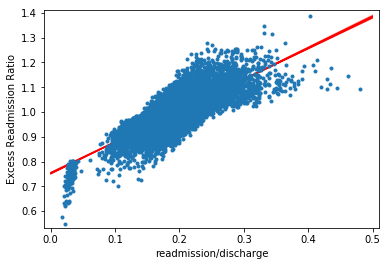

In [35]:
# Generate array of x-values for bootstrap lines: x
x = np.linspace(0, 0.5, num=30)
# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(short_df_1['adm dis ratio'], short_df_1['Excess Readmission Ratio'], marker='.',linestyle='none')

# Set the margins and label axes
_ = plt.xlabel('readmission/discharge')
_ = plt.ylabel('Excess Readmission Ratio')
plt.margins(0.02)
plt.show()